<p style="font-family: Arial; font-size:2.55em;color:purple; font-style:bold"><br>
Fashion-MNIST Classification</p><br>

In [1]:
from keras.datasets import fashion_mnist

(X_train,Y_train),(X_test, Y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


## Visualizing Loaded Data 

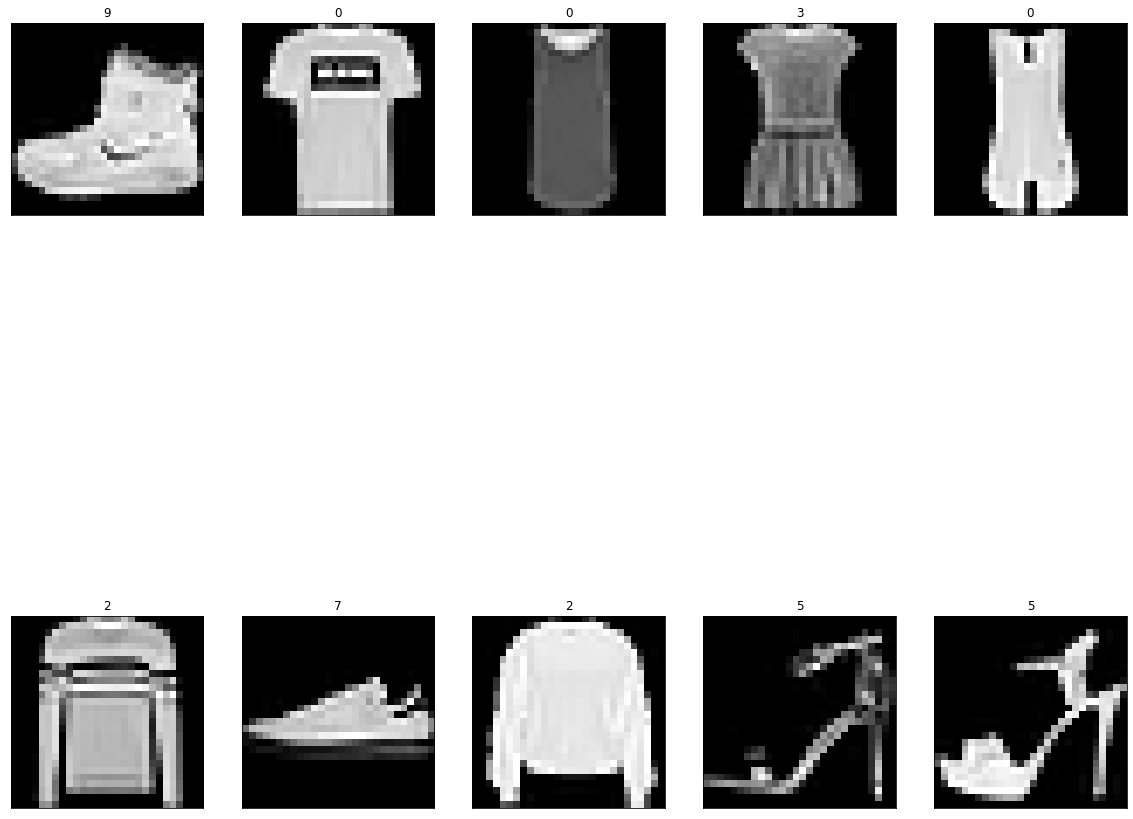

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig=plt.figure(figsize=(20,20))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(Y_train[i]))

## Rescaling Images 

In [3]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

## One-Hot Encoding

In [4]:
from keras.utils import np_utils

print('Integer Valued Labels: ')
print(Y_train[:15])

y_train_mod = np_utils.to_categorical(Y_train,10)
y_test_mod = np_utils.to_categorical(Y_test,10)

print('One-Hot Labels: ')
print(y_train_mod[:15])


Integer Valued Labels: 
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7]
One-Hot Labels: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


## Train-Validation Split

In [5]:
(X_train,X_valid)=X_train[5000:],X_train[:5000]
(y_train,y_valid)=y_train_mod[5000:],y_train_mod[:5000]

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0],28,28,1)
print('X_train Shape is :',X_train.shape)
print('y_train Shape is :',y_train.shape)


X_train Shape is : (55000, 28, 28, 1)
y_train Shape is : (55000, 10)


## Building A CNN Architecture

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D,MaxPooling2D,Flatten , BatchNormalization

cnn_model=Sequential()
cnn_model.add(Convolution2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',
                           input_shape=(28,28,1)))

cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))

cnn_model.add(Convolution2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))

cnn_model.add(Convolution2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))

cnn_model.add(Convolution2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(512,activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(10,activation='sigmoid'))

cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 32)         

## Compile Model  

In [7]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy'])

## Training Our Model 

In [9]:
from keras.callbacks import ModelCheckpoint

checkpointer= ModelCheckpoint(filepath='cnn.fashion.mnist.model.best.hdf5',
                             verbose=1,save_best_only=True,
                             )

hist=cnn_model.fit(X_train,y_train,batch_size=32,epochs=10,
                  validation_data=(X_valid,y_valid),callbacks=[checkpointer],
                  verbose=2,shuffle=True)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 - 64s - loss: 0.3681 - accuracy: 0.8662 - val_loss: 0.3465 - val_accuracy: 0.8800

Epoch 00001: val_loss improved from inf to 0.34655, saving model to cnn.fashion.mnist.model.best.hdf5
Epoch 2/10
 - 63s - loss: 0.3318 - accuracy: 0.8803 - val_loss: 0.2581 - val_accuracy: 0.8998

Epoch 00002: val_loss improved from 0.34655 to 0.25808, saving model to cnn.fashion.mnist.model.best.hdf5
Epoch 3/10
 - 62s - loss: 0.3086 - accuracy: 0.8877 - val_loss: 0.2407 - val_accuracy: 0.9062

Epoch 00003: val_loss improved from 0.25808 to 0.24066, saving model to cnn.fashion.mnist.model.best.hdf5
Epoch 4/10
 - 62s - loss: 0.2910 - accuracy: 0.8928 - val_loss: 0.2525 - val_accuracy: 0.9058

Epoch 00004: val_loss did not improve from 0.24066
Epoch 5/10
 - 62s - loss: 0.2829 - accuracy: 0.8969 - val_loss: 0.2476 - val_accuracy: 0.9144

Epoch 00005: val_loss did not improve from 0.24066
Epoch 6/10
 - 62s - loss: 0.2715 - accuracy: 0.9011 - val_lo

* Plotting Loss and Accuracy over validation data during training.

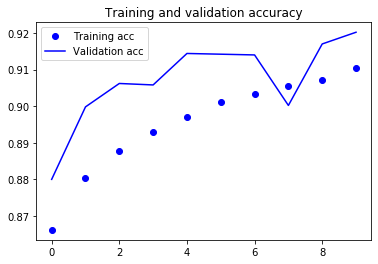

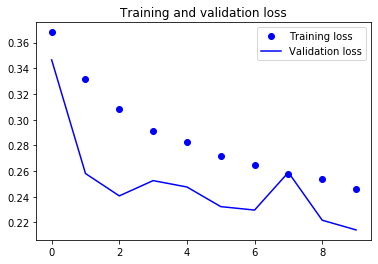

In [11]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Loading the Learned weights

In [12]:
cnn_model.load_weights('cnn.fashion.mnist.model.best.hdf5')

### Evaluating on test set

In [18]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)
y_test = y_test_mod


In [19]:
score= cnn_model.evaluate(X_test,y_test,verbose=0)
accuracy=score[1]*100

print('Test Accuracy: %.4f%%'%accuracy)

Test Accuracy: 91.6100%
